### Import Pandas

In [117]:
import pandas as pd

### Import the QC data cases per baranggay from Dr. Carvajal 

In [118]:
Dengue_QC=pd.read_csv('Carvajal_QC_Dengue_Aggr_per_month.csv')

In [119]:
Dengue_QC

,Formatted_Date,Barangay,YEAR,DC
0,2016-01-01,ALICIA,2016.0,1.0
1,2016-01-01,AMIHAN,2016.0,0.0
2,2016-01-01,APOLONIO SAMSON,2016.0,3.0
3,2016-01-01,BAESA,2016.0,5.0
4,2016-01-01,BAGBAG,2016.0,6.0
...,...,...,...,...
5249,2018-12-01,VETERAN'S VILLAGE,2018.0,6.0
5250,2018-12-01,VILLA MARIA CLARA,2018.0,6.0
5251,2018-12-01,WEST KAMIAS,2018.0,5.0
5252,2018-12-01,WEST TRIANGLE,2018.0,0.0


In [120]:
Dengue_QC['Formatted_Date']=pd.to_datetime(Dengue_QC.Formatted_Date)

In [121]:
Final_DF=pd.read_csv('final_merged_satellite_osm_social_listening.csv')

In [122]:
Final_DF.columns

Index(['lon', 'lat', 'Date', 'Year', 'Month', 'Name', 'City', 'Binary',
       'medRisk', 'highRisk', 'date_from', 'date_to', 'longitude', 'latitude',
       'OSM_network_id', 'nearest_clinic_hospital_doctors_1',
       'nearest_clinic_hospital_doctors_2',
       'nearest_clinic_hospital_doctors_3',
       'nearest_clinic_hospital_doctors_4',
       'nearest_clinic_hospital_doctors_5',
       'count_clinic_hospital_doctors_within_5.0km',
       'nearest_toilets_water_point_1', 'nearest_toilets_water_point_2',
       'nearest_toilets_water_point_3', 'nearest_toilets_water_point_4',
       'nearest_toilets_water_point_5',
       'count_toilets_water_point_within_5.0km',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_2',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_3',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_4',
   

In [123]:
Final_DF

,lon,lat,Date,Year,Month,Name,City,Binary,medRisk,highRisk,...,surface_temperature,precipitation_rate,relative_humidity,date,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
0,121.022904,14.660174,2017-02,2017,2,ALICIA,Quezon City,1,0,0,...,37.239718,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
1,121.066004,14.632222,2017-02,2017,2,AMIHAN,Quezon City,1,0,0,...,36.324251,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
2,121.004975,14.654071,2017-02,2017,2,APOLONIO SAMSON,Quezon City,1,0,0,...,37.406439,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
3,121.005814,14.616177,2017-02,2017,2,AURORA,Quezon City,1,0,0,...,37.321038,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
4,121.011184,14.667379,2017-02,2017,2,BAESA,Quezon City,1,0,0,...,36.562561,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,121.022184,14.652619,2018-05,2018,5,VETERANS VILLAGE,Quezon City,1,0,0,...,41.519248,0.000000e+00,61.653557,2018-05-31,8,2,1,1,1,False
3079,121.066421,14.616051,2018-05,2018,5,VILLA MARIA CLARA,Quezon City,1,0,0,...,41.115616,0.000000e+00,61.653557,2018-05-31,8,2,1,1,1,False
3080,121.046500,14.629207,2018-05,2018,5,WEST KAMIAS,Quezon City,1,0,0,...,41.630061,0.000000e+00,61.653557,2018-05-31,8,2,1,1,1,False
3081,121.028476,14.643920,2018-05,2018,5,WEST TRIANGLE,Quezon City,1,0,0,...,40.674512,0.000000e+00,61.653557,2018-05-31,8,2,1,1,1,False


In [124]:
Final_DF['date_from']=pd.to_datetime(Final_DF.date_from)

### Merge to Dengue Cases data to preprocessed OSM, Satellite data, Google Search Trends

In [125]:
Merged_DF= pd.merge(left = Dengue_QC,right = Final_DF,left_on=['Formatted_Date','Barangay'], right_on=['date_from','Name'])

In [126]:
Merged_DF

,Formatted_Date,Barangay,YEAR,DC,lon,lat,Date,Year,Month,Name,...,surface_temperature,precipitation_rate,relative_humidity,date,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
0,2017-02-01,ALICIA,2017.0,3.0,121.022904,14.660174,2017-02,2017,2,ALICIA,...,37.239718,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
1,2017-02-01,AMIHAN,2017.0,1.0,121.066004,14.632222,2017-02,2017,2,AMIHAN,...,36.324251,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
2,2017-02-01,APOLONIO SAMSON,2017.0,7.0,121.004975,14.654071,2017-02,2017,2,APOLONIO SAMSON,...,37.406439,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
3,2017-02-01,BAESA,2017.0,5.0,121.011184,14.667379,2017-02,2017,2,BAESA,...,36.562561,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
4,2017-02-01,BAGBAG,2017.0,7.0,121.036455,14.693252,2017-02,2017,2,BAGBAG,...,36.275577,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,2018-12-01,VASRA,2018.0,3.0,121.045928,14.657408,2018-12,2018,12,VASRA,...,37.230891,0.000000e+00,74.865967,2018-12-31,21,10,4,4,4,False
2366,2018-12-01,VILLA MARIA CLARA,2018.0,6.0,121.066421,14.616051,2018-12,2018,12,VILLA MARIA CLARA,...,35.547438,0.000000e+00,74.865967,2018-12-31,21,10,4,4,4,False
2367,2018-12-01,WEST KAMIAS,2018.0,5.0,121.046500,14.629207,2018-12,2018,12,WEST KAMIAS,...,37.833859,0.000000e+00,74.865967,2018-12-31,21,10,4,4,4,False
2368,2018-12-01,WEST TRIANGLE,2018.0,0.0,121.028476,14.643920,2018-12,2018,12,WEST TRIANGLE,...,38.105610,0.000000e+00,74.865967,2018-12-31,21,10,4,4,4,False


### Sort Data by Date 

In [127]:
Merged_DF.sort_values(by='Formatted_Date',ignore_index=True,inplace=True)

In [128]:
Merged_DF

,Formatted_Date,Barangay,YEAR,DC,lon,lat,Date,Year,Month,Name,...,surface_temperature,precipitation_rate,relative_humidity,date,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
0,2017-02-01,ALICIA,2017.0,3.0,121.022904,14.660174,2017-02,2017,2,ALICIA,...,37.239718,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
1,2017-02-01,RAMON MAGSAYSAY,2017.0,3.0,121.021235,14.659066,2017-02,2017,2,RAMON MAGSAYSAY,...,37.386524,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
2,2017-02-01,PROJECT 6,2017.0,5.0,121.038131,14.663158,2017-02,2017,2,PROJECT 6,...,37.487264,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
3,2017-02-01,PINYAHAN,2017.0,6.0,121.047259,14.640891,2017-02,2017,2,PINYAHAN,...,36.625711,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
4,2017-02-01,PHIL-AM,2017.0,1.0,121.028872,14.646264,2017-02,2017,2,PHIL-AM,...,37.975594,6.648649e-08,75.094772,2017-02-28,10,5,3,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,2018-12-01,DON MANUEL,2018.0,3.0,121.001659,14.616622,2018-12,2018,12,DON MANUEL,...,38.056010,0.000000e+00,74.865967,2018-12-31,21,10,4,4,4,False
2366,2018-12-01,DIOQUINO ZOBEL,2018.0,1.0,121.062568,14.619214,2018-12,2018,12,DIOQUINO ZOBEL,...,36.544350,0.000000e+00,74.865967,2018-12-31,21,10,4,4,4,False
2367,2018-12-01,DEL MONTE,2018.0,9.0,121.011861,14.643213,2018-12,2018,12,DEL MONTE,...,38.085542,0.000000e+00,74.865967,2018-12-31,21,10,4,4,4,False
2368,2018-12-01,MANGGA,2018.0,0.0,121.060435,14.625558,2018-12,2018,12,MANGGA,...,38.248773,0.000000e+00,74.865967,2018-12-31,21,10,4,4,4,False


In [129]:
TimeSeries_DF=Merged_DF.groupby('Formatted_Date')

TimeSeries_DF1=TimeSeries_DF.mean()
TimeSeries_DF2=TimeSeries_DF.sum()

TimeSeries_DF1['DC']=TimeSeries_DF2['DC']

In [130]:
TimeSeries_DF1

,YEAR,DC,lon,lat,Year,Month,Binary,medRisk,highRisk,longitude,...,aerosol,surface_temperature,precipitation_rate,relative_humidity,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
Formatted_Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,2017.0,336.0,121.039943,14.645372,2017.0,2.0,0.669903,0.077670,0.019417,121.039943,...,107.305440,36.252829,6.648649e-08,75.094772,10.0,5.0,3.0,2.0,1.0,0.0
2017-03-01,2017.0,275.0,121.039943,14.645372,2017.0,3.0,0.669903,0.058252,0.009709,121.039943,...,119.450049,39.661435,0.000000e+00,66.697929,12.0,4.0,2.0,2.0,2.0,0.0
2017-04-01,2017.0,205.0,121.039943,14.645372,2017.0,4.0,0.495146,0.029126,0.009709,121.039943,...,206.262126,41.238002,1.815000e-07,65.570572,9.0,2.0,1.0,1.0,1.0,0.0
2017-05-01,2017.0,180.0,121.039943,14.645372,2017.0,5.0,0.563107,0.038835,0.009709,121.039943,...,200.136612,41.292994,3.071795e-07,68.507233,6.0,2.0,1.0,1.0,0.0,0.0
2017-06-01,2017.0,453.0,121.039943,14.645372,2017.0,6.0,0.815534,0.155340,0.077670,121.039943,...,180.354682,38.558922,2.987805e-07,74.878487,8.0,3.0,2.0,1.0,1.0,0.0
2017-07-01,2017.0,1231.0,121.039943,14.645372,2017.0,7.0,0.893204,0.281553,0.184466,121.039943,...,210.675276,NaN,5.927262e-06,79.039444,19.0,6.0,5.0,3.0,2.0,0.0
2017-08-01,2017.0,1486.0,121.039943,14.645372,2017.0,8.0,0.922330,0.378641,0.213592,121.039943,...,148.261112,39.506032,8.823077e-07,73.939484,21.0,6.0,5.0,3.0,2.0,0.0
2017-09-01,2017.0,1027.0,121.039943,14.645372,2017.0,9.0,0.883495,0.310680,0.116505,121.039943,...,150.510151,41.538389,4.000000e-07,75.148834,17.0,5.0,4.0,2.0,1.0,0.0
2017-10-01,2017.0,990.0,121.039943,14.645372,2017.0,10.0,0.883495,0.242718,0.097087,121.039943,...,197.383761,33.297896,6.262857e-07,74.417915,15.0,5.0,4.0,3.0,1.0,0.0


### Plot Dengue Cases by Date

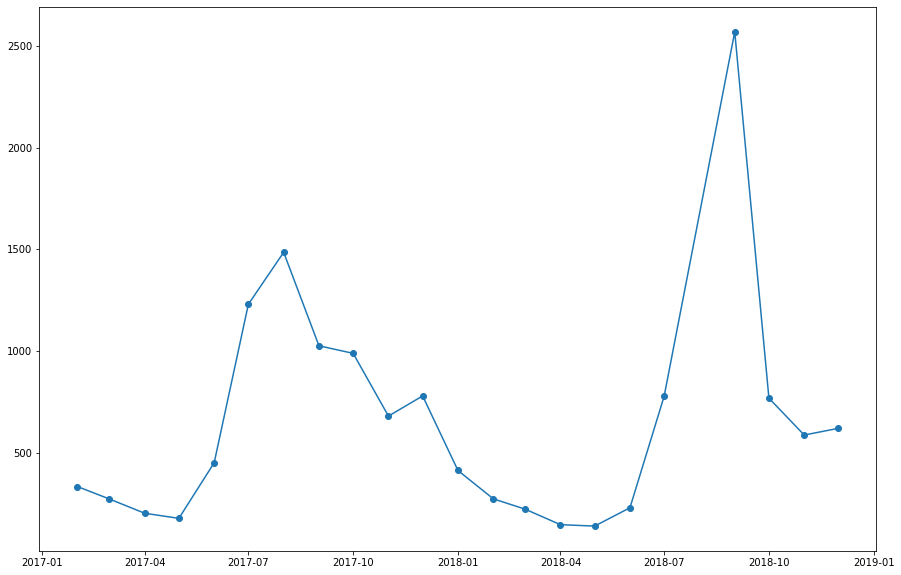

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
plt.plot(TimeSeries_DF1['DC'],marker='o')

## Prepare Data for modeling

Split data by: 
Training=75%
Testing=25%

In [132]:
train=TimeSeries_DF1[:math.ceil(TimeSeries_DF1.shape[0]*0.75)]

In [133]:
test =TimeSeries_DF1[math.ceil(TimeSeries_DF1.shape[0]*0.75):]

In [100]:
# train = Merged_DF.sample(frac=0.75, random_state=42)
# test = Merged_DF.drop(train.index
# train.reset_index(inplace=True, drop=True)
# test.reset_index(inplace=True, drop=True)

In [134]:
train

,YEAR,DC,lon,lat,Year,Month,Binary,medRisk,highRisk,longitude,...,aerosol,surface_temperature,precipitation_rate,relative_humidity,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
Formatted_Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,2017.0,336.0,121.039943,14.645372,2017.0,2.0,0.669903,0.077670,0.019417,121.039943,...,107.305440,36.252829,6.648649e-08,75.094772,10.0,5.0,3.0,2.0,1.0,0.0
2017-03-01,2017.0,275.0,121.039943,14.645372,2017.0,3.0,0.669903,0.058252,0.009709,121.039943,...,119.450049,39.661435,0.000000e+00,66.697929,12.0,4.0,2.0,2.0,2.0,0.0
2017-04-01,2017.0,205.0,121.039943,14.645372,2017.0,4.0,0.495146,0.029126,0.009709,121.039943,...,206.262126,41.238002,1.815000e-07,65.570572,9.0,2.0,1.0,1.0,1.0,0.0
2017-05-01,2017.0,180.0,121.039943,14.645372,2017.0,5.0,0.563107,0.038835,0.009709,121.039943,...,200.136612,41.292994,3.071795e-07,68.507233,6.0,2.0,1.0,1.0,0.0,0.0
2017-06-01,2017.0,453.0,121.039943,14.645372,2017.0,6.0,0.815534,0.155340,0.077670,121.039943,...,180.354682,38.558922,2.987805e-07,74.878487,8.0,3.0,2.0,1.0,1.0,0.0
2017-07-01,2017.0,1231.0,121.039943,14.645372,2017.0,7.0,0.893204,0.281553,0.184466,121.039943,...,210.675276,NaN,5.927262e-06,79.039444,19.0,6.0,5.0,3.0,2.0,0.0
2017-08-01,2017.0,1486.0,121.039943,14.645372,2017.0,8.0,0.922330,0.378641,0.213592,121.039943,...,148.261112,39.506032,8.823077e-07,73.939484,21.0,6.0,5.0,3.0,2.0,0.0
2017-09-01,2017.0,1027.0,121.039943,14.645372,2017.0,9.0,0.883495,0.310680,0.116505,121.039943,...,150.510151,41.538389,4.000000e-07,75.148834,17.0,5.0,4.0,2.0,1.0,0.0
2017-10-01,2017.0,990.0,121.039943,14.645372,2017.0,10.0,0.883495,0.242718,0.097087,121.039943,...,197.383761,33.297896,6.262857e-07,74.417915,15.0,5.0,4.0,3.0,1.0,0.0


In [135]:
test

,YEAR,DC,lon,lat,Year,Month,Binary,medRisk,highRisk,longitude,...,aerosol,surface_temperature,precipitation_rate,relative_humidity,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
Formatted_Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01,2018.0,779.0,121.039943,14.645372,2018.0,7.0,0.883495,0.223301,0.097087,121.039943,...,198.251158,38.947881,1.112444e-04,82.542580,18.0,4.0,5.0,3.0,3.0,0.0
2018-09-01,2018.0,2568.0,121.039943,14.645372,2018.0,9.0,0.970874,0.310680,0.135922,121.039943,...,158.646352,NaN,7.224000e-05,82.413033,28.0,6.0,4.0,4.0,1.0,0.0
2018-10-01,2018.0,770.0,121.039943,14.645372,2018.0,10.0,0.922330,0.252427,0.097087,121.039943,...,157.755200,37.827107,2.965174e-07,71.730003,17.0,4.0,3.0,2.0,1.0,0.0
2018-11-01,2018.0,589.0,121.039943,14.645372,2018.0,11.0,0.893204,0.184466,0.038835,121.039943,...,119.334594,36.774783,0.000000e+00,73.013519,20.0,9.0,4.0,5.0,1.0,0.0
2018-12-01,2018.0,622.0,121.039943,14.645372,2018.0,12.0,0.825243,0.087379,0.038835,121.039943,...,136.843516,37.002117,0.000000e+00,74.865967,21.0,10.0,4.0,4.0,4.0,0.0


In [136]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_cols = TimeSeries_DF1.select_dtypes(include=numerics).columns
# numerical_cols

In [137]:
numerical_cols

Index(['YEAR', 'DC', 'lon', 'lat', 'Year', 'Month', 'Binary', 'medRisk',
       'highRisk', 'longitude', 'latitude', 'OSM_network_id',
       'nearest_clinic_hospital_doctors_1',
       'nearest_clinic_hospital_doctors_2',
       'nearest_clinic_hospital_doctors_3',
       'nearest_clinic_hospital_doctors_4',
       'nearest_clinic_hospital_doctors_5',
       'count_clinic_hospital_doctors_within_5.0km',
       'nearest_toilets_water_point_1', 'nearest_toilets_water_point_2',
       'nearest_toilets_water_point_3', 'nearest_toilets_water_point_4',
       'nearest_toilets_water_point_5',
       'count_toilets_water_point_within_5.0km',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_2',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_3',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_4',
       'nearest_sanitary_dump_station

In [138]:
target = 'DC'
ignore_cols = ['Date', 'City', 'Name', 'highRisk', 'medRisk', 'date_from', 'date_to', 'longitude', 'latitude',
               'isPartial', 'date', 'geometry', 'buffered_geometry', 'OSM_network_id'] + [i for i in TimeSeries_DF1.columns if 'nearest' in i]
numerical_features = [i for i in numerical_cols if not i in ignore_cols and not "nearest" in i].remove(target)
# numerical_features

In [139]:
X_train = train[numerical_cols].drop(['Binary', 'medRisk', 'highRisk', 'OSM_network_id','lat','lon','latitude','longitude','Year','YEAR','Month','DC'], axis=1)
y_train = train[[target]]
X_test = test[numerical_cols].drop(['Binary', 'medRisk', 'highRisk', 'OSM_network_id','lat','lon','latitude','longitude','Year','YEAR','Month','DC'], axis=1)
y_test = test[[target]]

In [140]:
X_train.shape

(17, 39)

### Columns used in training

In [141]:
X_train.columns

Index(['nearest_clinic_hospital_doctors_1',
       'nearest_clinic_hospital_doctors_2',
       'nearest_clinic_hospital_doctors_3',
       'nearest_clinic_hospital_doctors_4',
       'nearest_clinic_hospital_doctors_5',
       'count_clinic_hospital_doctors_within_5.0km',
       'nearest_toilets_water_point_1', 'nearest_toilets_water_point_2',
       'nearest_toilets_water_point_3', 'nearest_toilets_water_point_4',
       'nearest_toilets_water_point_5',
       'count_toilets_water_point_within_5.0km',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_2',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_3',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_4',
       'nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_5',
       'count_sanitary_dump_station_waste_disposal_waste_transfer_station_within_5.0km',
   

In [149]:
X_train

,nearest_clinic_hospital_doctors_1,nearest_clinic_hospital_doctors_2,nearest_clinic_hospital_doctors_3,nearest_clinic_hospital_doctors_4,nearest_clinic_hospital_doctors_5,count_clinic_hospital_doctors_within_5.0km,nearest_toilets_water_point_1,nearest_toilets_water_point_2,nearest_toilets_water_point_3,nearest_toilets_water_point_4,...,aerosol,surface_temperature,precipitation_rate,relative_humidity,dengue,dengue symptoms,dengue fever,symptoms of dengue,dengue sintomas,isPartial
Formatted_Date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,867.934776,1171.707711,1361.988530,1537.373525,1682.764440,68.330097,1284.732359,1736.704334,2208.570574,2517.413599,...,107.305440,36.252829,6.648649e-08,75.094772,10.0,5.0,3.0,2.0,1.0,0.0
2017-03-01,867.934776,1171.707711,1361.988530,1537.373525,1682.764440,68.330097,1284.732359,1736.704334,2208.570574,2517.413599,...,119.450049,39.661435,0.000000e+00,66.697929,12.0,4.0,2.0,2.0,2.0,0.0
2017-04-01,867.934776,1171.707711,1361.988530,1537.373525,1682.764440,68.330097,1284.732359,1736.704334,2208.570574,2517.413599,...,206.262126,41.238002,1.815000e-07,65.570572,9.0,2.0,1.0,1.0,1.0,0.0
2017-05-01,867.934776,1171.707711,1361.988530,1537.373525,1682.764440,68.330097,1284.732359,1736.704334,2208.570574,2517.413599,...,200.136612,41.292994,3.071795e-07,68.507233,6.0,2.0,1.0,1.0,0.0,0.0
2017-06-01,867.934776,1171.707711,1361.988530,1537.373525,1682.764440,68.330097,1284.732359,1736.704334,2208.570574,2517.413599,...,180.354682,38.558922,2.987805e-07,74.878487,8.0,3.0,2.0,1.0,1.0,0.0
2017-07-01,867.934776,1171.707711,1361.988530,1537.373525,1682.764440,68.330097,1284.732359,1736.704334,2208.570574,2517.413599,...,210.675276,NaN,5.927262e-06,79.039444,19.0,6.0,5.0,3.0,2.0,0.0
2017-08-01,867.934776,1171.707711,1361.988530,1537.373525,1682.764440,68.330097,1284.732359,1736.704334,2208.570574,2517.413599,...,148.261112,39.506032,8.823077e-07,73.939484,21.0,6.0,5.0,3.0,2.0,0.0
2017-09-01,867.934776,1171.707711,1361.988530,1537.373525,1682.764440,68.330097,1284.732359,1736.704334,2208.570574,2517.413599,...,150.510151,41.538389,4.000000e-07,75.148834,17.0,5.0,4.0,2.0,1.0,0.0
2017-10-01,867.934776,1171.707711,1361.988530,1537.373525,1682.764440,68.330097,1284.732359,1736.704334,2208.570574,2517.413599,...,197.383761,33.297896,6.262857e-07,74.417915,15.0,5.0,4.0,3.0,1.0,0.0


In [142]:
y_train.shape

(17, 1)

# Regression Function is using a Classifier Underneath
thus making the error

In [79]:
from aedes.automl_utils import perform_regression

In [80]:
model, feature_imps_df = perform_regression(X_train, y_train, max_time_mins=30)

Imputing missing values in feature set


ValueError: train_size=17 should be either positive and smaller than the number of samples 17 or a float in the (0, 1) range

### Solution is to import TPOTRegressor manually

In [143]:
from tpot import TPOTRegressor



tpot = TPOTRegressor(generations=20, population_size=50, verbosity=2,n_jobs=-1)
tpot.fit(X_train, y_train)


Imputing missing values in feature set


Optimization Progress:   0%|          | 0/1050 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -150283.97818721048

Generation 2 - Current best internal CV score: -149274.11821060907

Generation 3 - Current best internal CV score: -143658.65286708716

Generation 4 - Current best internal CV score: -139569.98498484804

Generation 5 - Current best internal CV score: -113877.45324074074

Generation 6 - Current best internal CV score: -113877.45324074074

Generation 7 - Current best internal CV score: -88792.70452113387

Generation 8 - Current best internal CV score: -88792.70452113387

Generation 9 - Current best internal CV score: -88792.70452113387

Generation 10 - Current best internal CV score: -88792.70452113387

Generation 11 - Current best internal CV score: -82263.2649709758

Generation 12 - Current best internal CV score: -82263.2649709758

Generation 13 - Current best internal CV score: -82263.2649709758

Generation 14 - Current best internal CV score: -82263.2649709758

Generation 15 - Current best internal CV score: -61240

TPOTRegressor(generations=20, n_jobs=-1, population_size=50, verbosity=2)

In [144]:
from sklearn.metrics import r2_score

In [145]:
X_test=X_test.fillna(0)

In [146]:
predictions=tpot.predict(X_test)

Imputing missing values in feature set


### Import R2_score

In [147]:
r2_score(y_test,predictions)

-0.09592878613890243